# Introduction to time series analysis and forecasting

The dataset consists of multipe time series representing an aggregated number of daily views for multiple Wikipedia articles, starting from July, 1st, 2015 up until August 2Oth, 2017.



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from main.utils.utils_methods import clean


In [29]:
# Import the 90 traffiic time series
data = pd.read_csv("../compet_data/public/train.csv", index_col = "Day", parse_dates = True)
data = data.asfreq("D")
data.head()

,series-1,series-2,series-3,series-4,series-5,series-6,series-7,series-8,series-9,series-10,...,series-81,series-82,series-83,series-84,series-85,series-86,series-87,series-88,series-89,series-90
Day,,,,,,,,,,,,,,,,,,,,,
2015-07-01,1124911,1094599,950528,895063,882603,1133217,919164,1012398,1111857,1105216,...,19369,10936,20568,10457,20108,10286,15471,7012,6720,10756
2015-07-02,1185067,1089683,921668,1009488,899151,1108631,961996,1087777,984840,1078321,...,19528,10584,27653,10281,21390,10427,15806,7038,6727,12359
2015-07-03,1009713,1107112,893070,912086,882802,1157758,916675,1028280,988778,1049865,...,17197,8685,20455,9245,14879,9392,15003,6905,6506,11140
2015-07-04,975221,1142527,873749,903345,861999,1158446,1022921,1041738,966049,1109403,...,12967,7910,20443,7589,14206,8793,13499,6225,6374,10199
2015-07-05,1063136,1136648,928486,981824,946634,1302935,1092843,1036610,1141132,1102162,...,15075,9753,18752,8523,16596,10154,13968,7121,8350,12260


<AxesSubplot:xlabel='Day'>

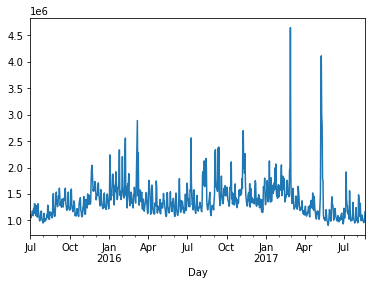

In [30]:
# Choose the time series to work with: "series-1", "series-2", ..., "series-90" 
# Reapeat the analysis for multiple series
myts = "series-10"
DT = data[myts]
DT.plot()


Read the code associated to the function "clean", and briefly describe what it is doing.

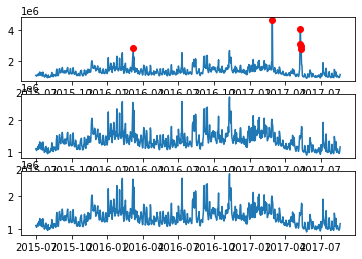

In [31]:
    series = DT
    series_cleaned_1, outliers_1 = clean(series)
    series_cleaned_2, outliers_2 = clean(series_cleaned_1)

    plt.subplot(3, 1, 1)
    plt.plot(series)
    plt.plot(series.loc[outliers_1], 'ro')

    plt.subplot(3, 1, 2)
    plt.plot(series_cleaned_1)
    plt.plot(series_cleaned_1.loc[outliers_2], 'ro')

    plt.subplot(3, 1, 3)
    plt.plot(series_cleaned_2)

<AxesSubplot:xlabel='Day'>

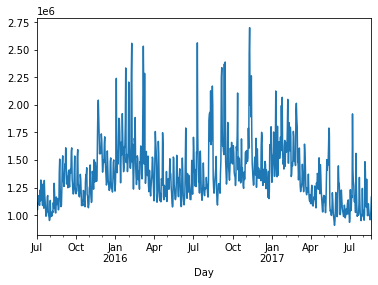

In [32]:
# Handle outliers
DT_cleaned_1, _ = clean(DT)
DT_cleaned_2, _ = clean(DT_cleaned_1)
DT.loc[:] = DT_cleaned_2
DT.plot()


In [33]:
DT = DT.to_frame()
DT["d"] = data.index.day.to_numpy()
DT["m"] = data.index.month.to_numpy()
DT["y"] = data.index.year.to_numpy()
DT["w"] = data.index.weekday.to_numpy()
DT["wy"] = data.index.weekofyear.to_numpy()
DT.head()

,series-10,d,m,y,w,wy
Day,,,,,,
2015-07-01,1105216.0,1,7,2015,2,27
2015-07-02,1078321.0,2,7,2015,3,27
2015-07-03,1049865.0,3,7,2015,4,27
2015-07-04,1109403.0,4,7,2015,5,27
2015-07-05,1102162.0,5,7,2015,6,27


# Seasonal plots

The following code shows how to compute a seasonal plot (for the day of the month).

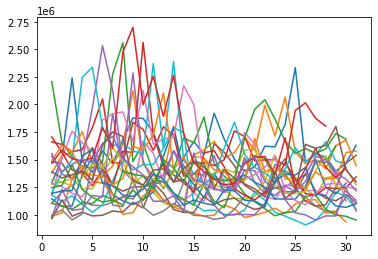

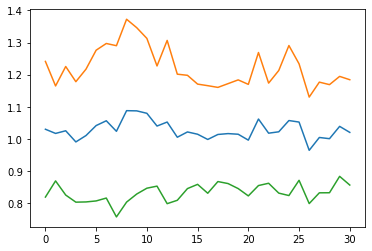

In [40]:
## Day of the month
patterns_day_month = DT[[myts, "d", "m", "y"]].pivot_table(index=['d'], columns=['m', 'y'])
plt.plot(patterns_day_month)
plt.show()

# Average seasonal pattern
patterns = patterns_day_month.div(patterns_day_month.median(axis=1), axis=0)
avg_day_month = np.nanmean(patterns, axis = 1)
std_day_month = np.nanstd(patterns, axis = 1)
plt.plot(pd.DataFrame({"avg": avg_day_month, "std+": avg_day_month +  std_day_month, "std-": avg_day_month -  std_day_month}))
plt.show()

Using the previous code, produce a seasonal plot for the day of the week.

# Lag plot
Produce lagged scatterplots for multiple lags. What do you observe? Add the diagonal for a better visualization.

In [ ]:
# Use pd.shift

## Autocorrelation
Plot the autocorrelation function (ACF) for the first 20 lags, and interpret the results. 
Recompute the ACF after applying a seasonal difference. 




In [ ]:
from statsmodels.tsa.stattools import acf 
from statsmodels.graphics.tsaplots import plot_acf
# Use np.diff


## White noise process

- Generate a time series with 500 observations from a white noise process with zero mean and unit standard deviation.
- Plot the tiime series
- Compute and plot the ACF for 50 lags
- Did you expect to see such results? Why?



In [ ]:
# use np.random.normal and plot_acf

## Transformations

Compute various Box-Cox transformations. Which one do you think is more appropriate?

In [ ]:
from scipy.stats import boxcox




## Time series decomposition 


Decompose the time series into trend, seasonal and remainder components. Does it help you to understand the data?

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
# STL decomposition
from statsmodels.tsa.seasonal import STL

Produce forecasts for the next 21 days using simple methods. Analyze the residuals. Compare the forecast accuracy for different accuracy measures.